<a href="https://colab.research.google.com/github/DarceCat/Adrian-Milroy/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158702 sha256=90aea56388f50b1ab94ba951b261e0d0ecc32f9bc4e4d4a28d170776a08aa43e
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=83165f33dd9cd0c5c9d748fd9cd2700a0c45f12195a5c7bfdfebb466dae5fa1c
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
pip install pandas scipy

In [2]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving titanic.arff to titanic.arff


In [32]:
from scipy.io import arff
import pandas as pd
import io

# Step 2: Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Step 3: Load the ARFF file (decode the bytes to a string first)
file_content = uploaded[filename].decode('utf-8')
data = arff.loadarff(io.StringIO(file_content))

# Step 4: Convert to a pandas DataFrame
df = pd.DataFrame(data[0])

df0 = df.copy()

# Step 5: Display the first few rows of the DataFrame
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Title
0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0
2,1.0,3.0,1.0,3.0,0.0,0.0,0.0,2.0
3,1.0,1.0,1.0,5.0,3.0,0.0,1.0,3.0
4,0.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0


In [4]:
#Examine the dataset
print("#Rows: ",df.shape[0])
print("#Columns: ", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types of Each Column:\n", df.dtypes)

# Print the range of values per column
column_ranges = df.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

#Looks like all columns have numerically categorized

#Rows:  891
#Columns:  8

Column Names: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'relatives', 'Title']

Data Types of Each Column:
 Survived     float64
Pclass       float64
Sex          float64
Age          float64
Fare         float64
Embarked     float64
relatives    float64
Title        float64
dtype: object
           min   max
Survived   0.0   1.0
Pclass     1.0   3.0
Sex        0.0   1.0
Age        0.0   6.0
Fare       0.0   5.0
Embarked   0.0   2.0
relatives  0.0  10.0
Title      1.0   5.0


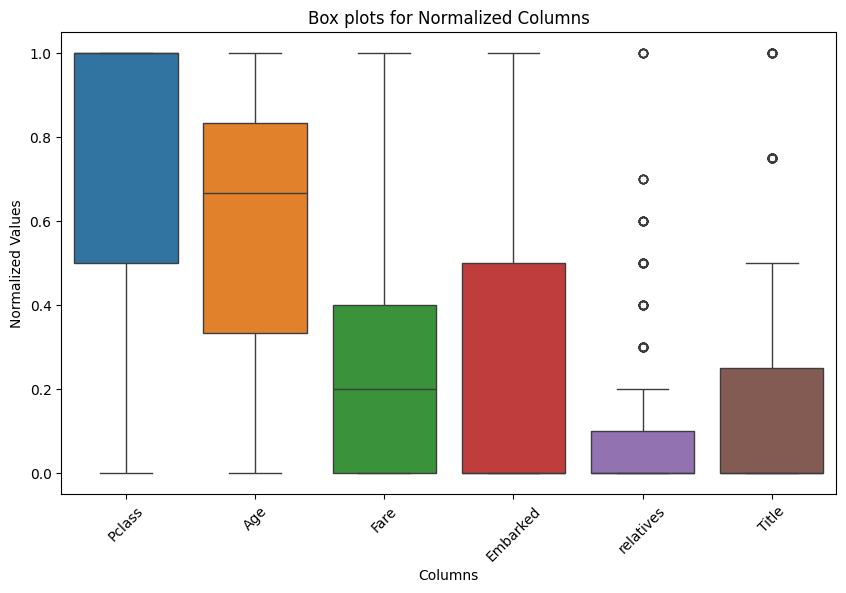

           min   max
Survived   0.0   1.0
Pclass     1.0   3.0
Sex        0.0   1.0
Age        0.0   6.0
Fare       0.0   5.0
Embarked   0.0   2.0
relatives  0.0  10.0
Title      1.0   5.0


In [5]:
#Quick visualization of ranges of each column - we'll use a tool to normalize the key values so they are comparable in one chart, no need to bring in binary or categorical values

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

# Select columns for visualization
columns_to_normalize = ['Pclass', 'Age', 'Fare', 'Embarked', 'relatives', 'Title']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = df.copy()  # Make a copy to preserve the original DataFrame
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Create box plots for normalized columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized[columns_to_normalize])
plt.title('Box plots for Normalized Columns')
plt.xlabel('Columns')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.show()
print(column_ranges)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth= 4, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

# Get the depth of the trained decision tree
tree_depth = clf.get_depth()

print(f'The depth of the decision tree is: {tree_depth}')


Accuracy: 0.8028846153846154
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       380
         1.0       0.83      0.63      0.71       244

    accuracy                           0.80       624
   macro avg       0.81      0.77      0.78       624
weighted avg       0.81      0.80      0.80       624

Confusion Matrix:
[[348  32]
 [ 91 153]]
The depth of the decision tree is: 4


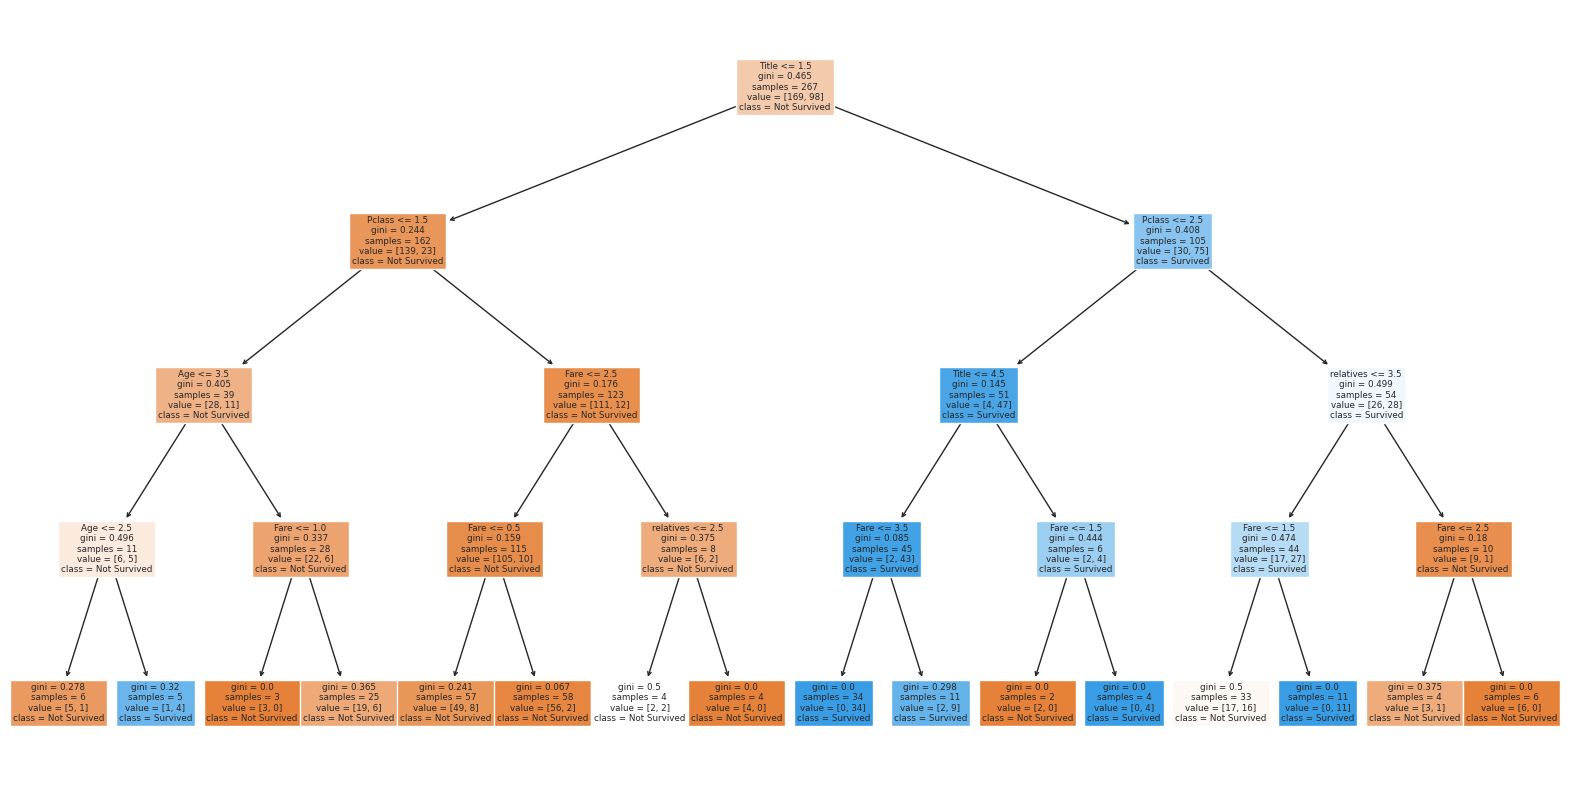

In [11]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
# Get feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
6      Title    0.601946
0     Pclass    0.148834
3       Fare    0.130589
5  relatives    0.074850
2        Age    0.043781
1        Sex    0.000000
4   Embarked    0.000000


#Let's try to manually engineer our our tree

Let's do some deeper EDA



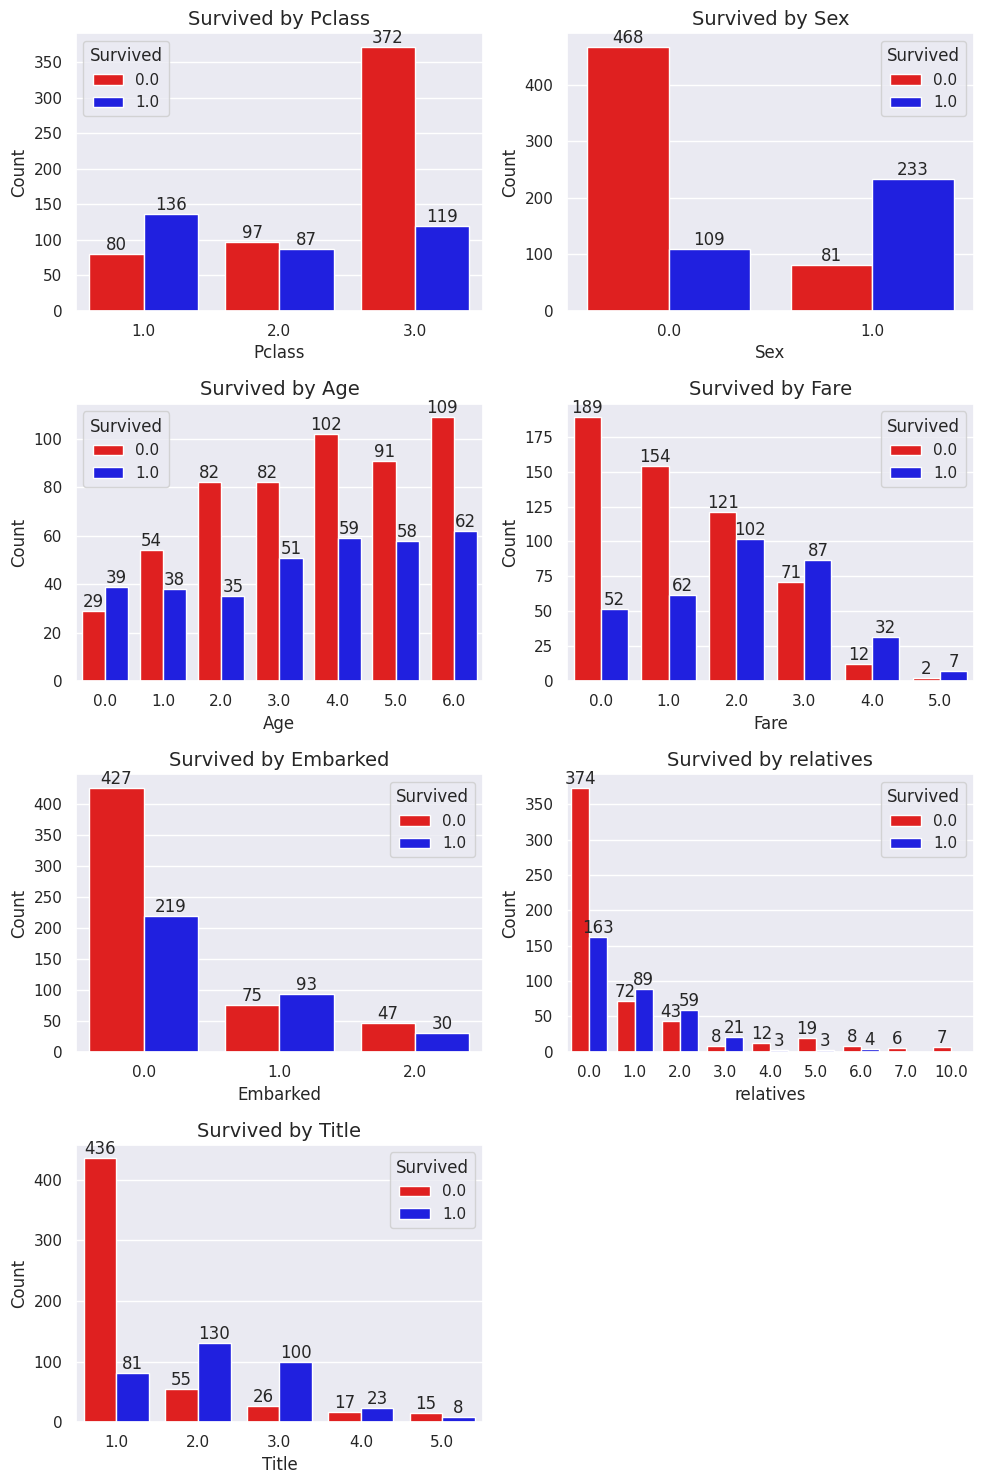

In [12]:
# Set the style for seaborn
sns.set(style="darkgrid")

# List of parameters to plot
parameters = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'relatives', 'Title']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot bar charts for each parameter
for i, param in enumerate(parameters):
    # Group by the parameter and survived, then count the occurrences
    data = df.groupby([param, 'Survived']).size().reset_index(name='count')

    # Create a barplot with blue and red bars for Survived = 1 and Survived = 0
    sns.barplot(x=param, y='count', hue='Survived', data=data, palette={1: 'blue', 0: 'red'}, ax=axes[i])

    # Set titles and labels
    axes[i].set_title(f'Survived by {param}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(param)

    # Add labels to the bars
    for bar in axes[i].containers:
        axes[i].bar_label(bar, label_type='edge')

# Remove the empty subplot if the number of parameters is odd
if len(parameters) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


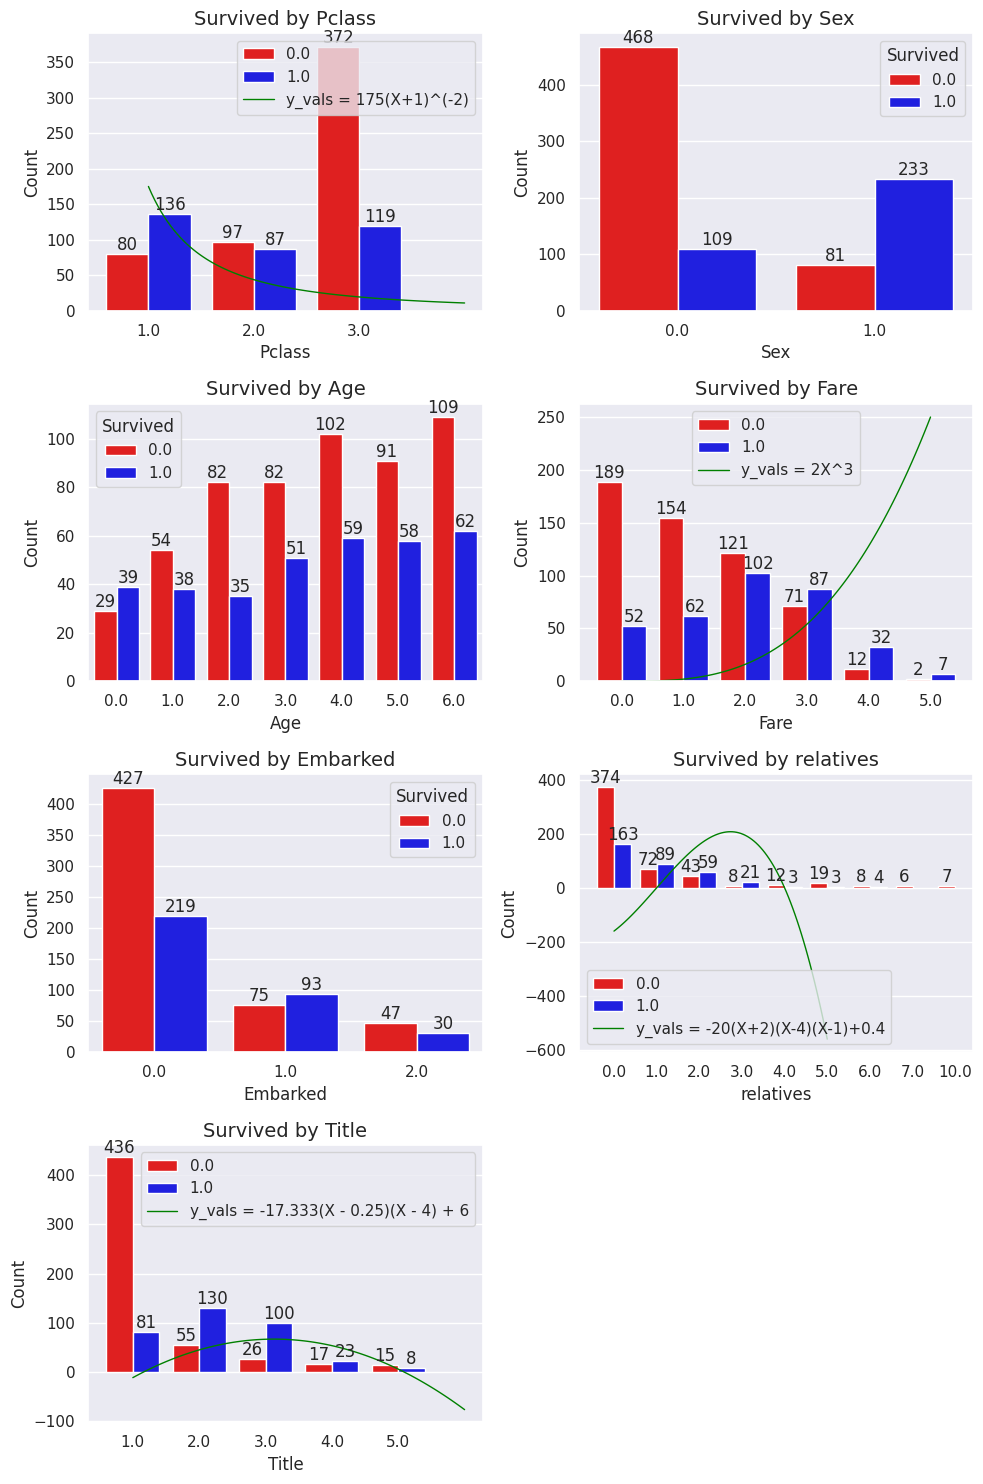

In [14]:
#Let's try to fit mathematical functions to model the each parameter in an attempt to seperate survived/non-survived in the most optimal fashion

import numpy as np

# Set the style for seaborn
sns.set(style="darkgrid")

# List of parameters to plot
parameters = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'relatives', 'Title']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot bar charts for each parameter
for i, param in enumerate(parameters):
    # Group by the parameter and survived, then count the occurrences
    data = df.groupby([param, 'Survived']).size().reset_index(name='count')

    # Create a barplot with blue and red bars for Survived = 1 and Survived = 0
    sns.barplot(x=param, y='count', hue='Survived', data=data, palette={1: 'blue', 0: 'red'}, ax=axes[i])

    # Set titles and labels
    axes[i].set_title(f'Survived by {param}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(param)

    # Add labels to the bars
    for bar in axes[i].containers:
        axes[i].bar_label(bar, label_type='edge')

    # Overlay mathematical functions on specific subplots
    if param == 'Pclass':
        # Define the mathematical function for Pclass2: y = 1/x
        x_vals = np.linspace(df['Pclass'].min()-1, df['Pclass'].max(), 100)
        y_vals = 175 * (x_vals+1)**(-2)

        axes[i].plot(x_vals, y_vals, color='green', label=r'y_vals = 175(X+1)^(-2)', linewidth=1)
        axes[i].legend()

    if param == 'Title':
        # Define the mathematical function
        x_vals = np.linspace(df['Title'].min()-1, df['Title'].max(), 100)
        y_vals = -17.333 * (x_vals - 0.25) * (x_vals - 4) + 6

        # Plot the function on the 'Title' subplot
        axes[i].plot(x_vals, y_vals, color='green', label=r'y_vals = -17.333(X - 0.25)(X - 4) + 6', linewidth=1)
        axes[i].legend()

    if param == 'relatives':
        # Define the mathematical function
        x_vals = np.linspace(df['relatives'].min(), df['relatives'].max()-5, 100)
        y_vals = -20*(x_vals+2)*(x_vals-4)*(x_vals-1)+0.4

        # Plot the function on the 'Title' subplot
        axes[i].plot(x_vals, y_vals, color='green', label=r'y_vals = -20(X+2)(X-4)(X-1)+0.4', linewidth=1)
        axes[i].legend()

    elif param == 'Fare':
        # Define the mathematical function for Fare2: y = x^3
        x_vals = np.linspace(df['Fare'].min(), df['Fare'].max(), 100)
        y_vals = 2*x_vals ** 3
        axes[i].plot(x_vals, y_vals, color='green', label=r'y_vals = 2X^3', linewidth=1)
        axes[i].legend()

# Remove the empty subplot if the number of parameters is odd
if len(parameters) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Let's visualise some combinations of features that make logical sense:


#Age/Sex score? maybe with Pclass
#Relatives with Age/Sex
#Other combos?

In [19]:
#Let's create some new features by weighting and transforming the current features to capture the most survivors

# Create the new feature 'Pclass2' and 'Fare2'
df['Pclass2'] =  175 * (df['Pclass'])**(-2)
df['Fare2'] = 2*(df['Fare']) ** 3

# Display the first few rows to verify the new feature
print(df[['Pclass','Pclass2','Fare', 'Fare2', 'Survived']].head(10))


   Pclass     Pclass2  Fare  Fare2  Survived
0     3.0   19.444444   0.0    0.0       0.0
1     1.0  175.000000   3.0   54.0       1.0
2     3.0   19.444444   0.0    0.0       1.0
3     1.0  175.000000   3.0   54.0       1.0
4     3.0   19.444444   1.0    2.0       0.0
5     3.0   19.444444   1.0    2.0       0.0
6     1.0  175.000000   3.0   54.0       0.0
7     3.0   19.444444   2.0   16.0       0.0
8     3.0   19.444444   1.0    2.0       1.0
9     2.0   43.750000   2.0   16.0       1.0


In [20]:
#Let's now transform Age and Title, Sex already has a good boundary at 0.5

# Create a new feature 'Age2' that triples the weight for Age < 1.5
df['Age2'] = df['Age'].apply(lambda x: 3 if x < 1.5 else 1)

# Create the new feature 'Title2' = desinging a mathematical function that peaks around 3, and go to 0 at 0-1 or 5-6.
df['Title2'] = -17.333 * (df['Title'] - 1) * (df['Title'] - 5) + 6

# Display the first few rows to verify the new feature
print(df.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  relatives  Title     Pclass2  \
0       0.0     3.0  0.0  2.0   0.0       0.0        1.0    1.0   19.444444   
1       1.0     1.0  1.0  5.0   3.0       1.0        1.0    3.0  175.000000   
2       1.0     3.0  1.0  3.0   0.0       0.0        0.0    2.0   19.444444   
3       1.0     1.0  1.0  5.0   3.0       0.0        1.0    3.0  175.000000   
4       0.0     3.0  0.0  5.0   1.0       0.0        0.0    1.0   19.444444   

   Fare2  Age2  Title2  
0    0.0     1   6.000  
1   54.0     1  75.332  
2    0.0     1  57.999  
3   54.0     1  75.332  
4    2.0     1   6.000  


In [21]:
#Let's engineer 'relatives' to create a new feature called 'relatives2'

# Create the new feature 'Family' based on the specified weightings
df['Relatives2'] = -20*(df['relatives']-.5)*(df['relatives']-4.5)+0.5

# Display the first few rows to verify the new feature
print(df.head())


   Survived  Pclass  Sex  Age  Fare  Embarked  relatives  Title     Pclass2  \
0       0.0     3.0  0.0  2.0   0.0       0.0        1.0    1.0   19.444444   
1       1.0     1.0  1.0  5.0   3.0       1.0        1.0    3.0  175.000000   
2       1.0     3.0  1.0  3.0   0.0       0.0        0.0    2.0   19.444444   
3       1.0     1.0  1.0  5.0   3.0       0.0        1.0    3.0  175.000000   
4       0.0     3.0  0.0  5.0   1.0       0.0        0.0    1.0   19.444444   

   Fare2  Age2  Title2  Relatives2  
0    0.0     1   6.000        35.5  
1   54.0     1  75.332        35.5  
2    0.0     1  57.999       -44.5  
3   54.0     1  75.332        35.5  
4    2.0     1   6.000       -44.5  


In [22]:
#Consolidate the dataset into df2
# Create df2 by dropping the specified columns and keeping 'Stature', 'Ritz', 'Embarked', and 'relatives'
df2 = df.drop(columns=['Age', 'Sex', 'Title', 'Pclass', 'Fare','relatives'])

# Display the first few rows of df2 to verify
print(df2.head())

   Survived  Embarked     Pclass2  Fare2  Age2  Title2  Relatives2
0       0.0       0.0   19.444444    0.0     1   6.000        35.5
1       1.0       1.0  175.000000   54.0     1  75.332        35.5
2       1.0       0.0   19.444444    0.0     1  57.999       -44.5
3       1.0       0.0  175.000000   54.0     1  75.332        35.5
4       0.0       0.0   19.444444    2.0     1   6.000       -44.5


Now let's run our scikit learn decision tree again on these new engineered features



Accuracy: 0.8146487294469357
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       409
         1.0       0.80      0.70      0.74       260

    accuracy                           0.81       669
   macro avg       0.81      0.79      0.80       669
weighted avg       0.81      0.81      0.81       669

Confusion Matrix:
[[364  45]
 [ 79 181]]
The depth of the decision tree is: 5


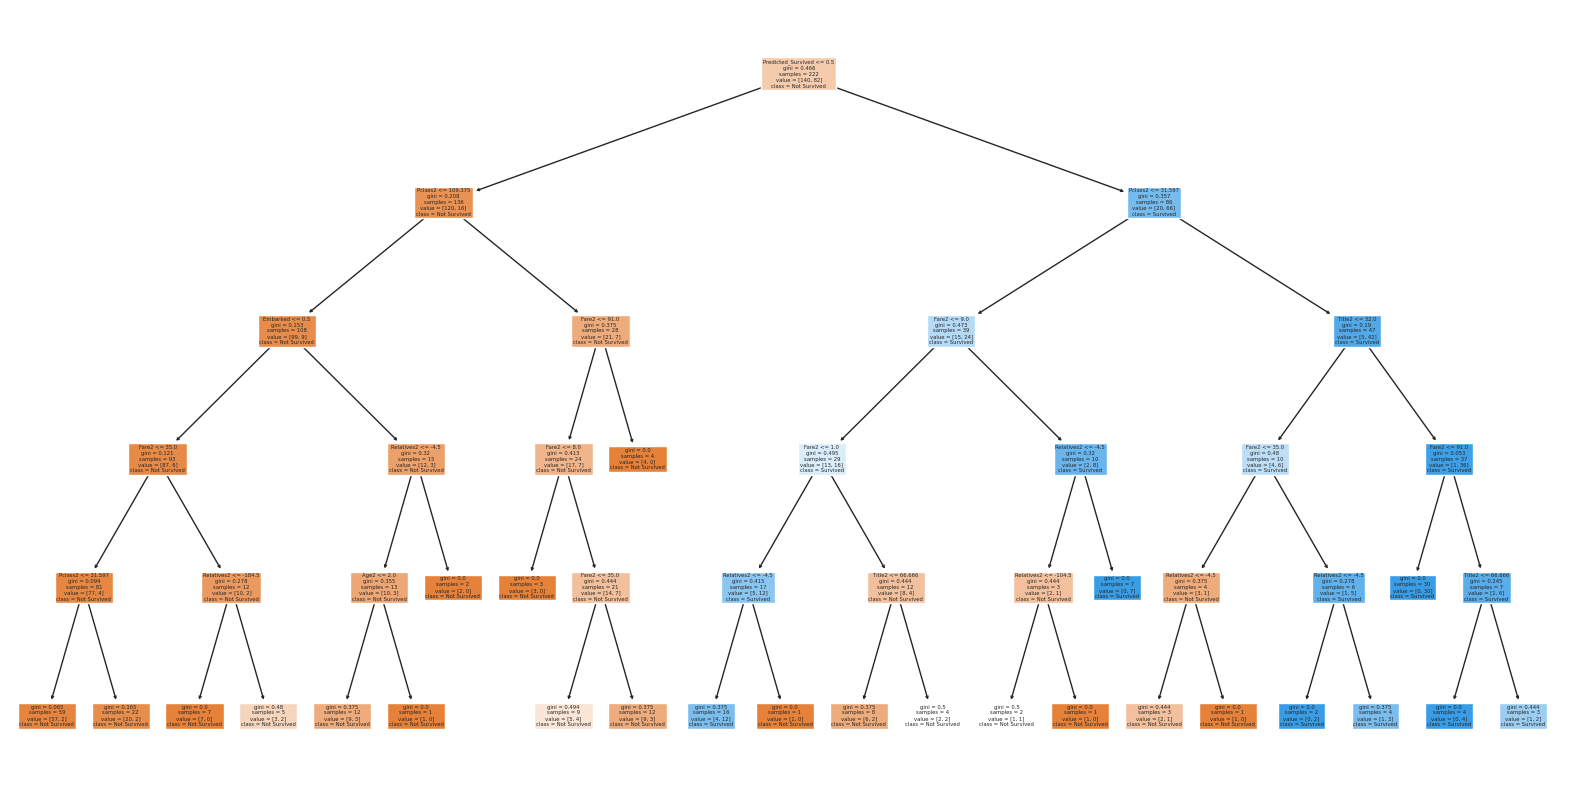

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocessing: Handle any missing values if present
# In this case, the dataset appears to be clean based on the preview

# Separate features and target variable
X = df2.drop('Survived', axis=1)  # Features
y = df2['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth= 5, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

# Get the depth of the trained decision tree
tree_depth = clf.get_depth()

print(f'The depth of the decision tree is: {tree_depth}')

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [24]:
# Make predictions on the entire dataset (df2) using the trained classifier
df2['Predicted_Survived'] = clf.predict(X)

# Display the first few rows to check the new column
df2.head()

,Survived,Embarked,Pclass2,Fare2,Age2,Title2,Relatives2,Predicted_Survived
0,0.0,0.0,19.444444,0.0,1,6.000,35.5,0.0
1,1.0,1.0,175.000000,54.0,1,75.332,35.5,1.0
2,1.0,0.0,19.444444,0.0,1,57.999,-44.5,1.0
3,1.0,0.0,175.000000,54.0,1,75.332,35.5,1.0
4,0.0,0.0,19.444444,2.0,1,6.000,-44.5,0.0


In [25]:
# Get feature importances
importances = clf.feature_importances_
feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df2)

      Feature  Importance
4      Title2    0.634703
1     Pclass2    0.197556
2       Fare2    0.110825
0    Embarked    0.034577
3        Age2    0.015465
5  Relatives2    0.006873


Let's use a different Algorith - Random Forest


In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8011958146487295
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       409
         1.0       0.75      0.73      0.74       260

    accuracy                           0.80       669
   macro avg       0.79      0.79      0.79       669
weighted avg       0.80      0.80      0.80       669

Confusion Matrix:
[[346  63]
 [ 70 190]]


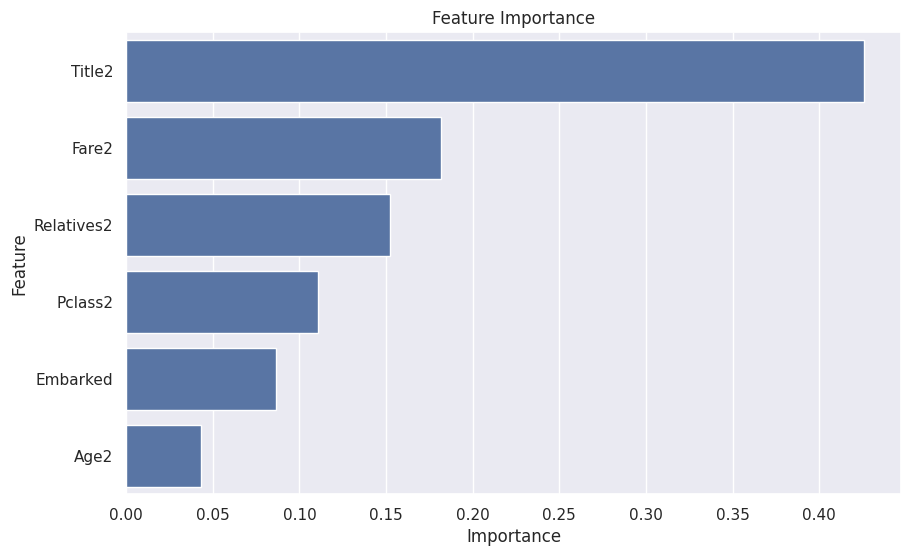

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


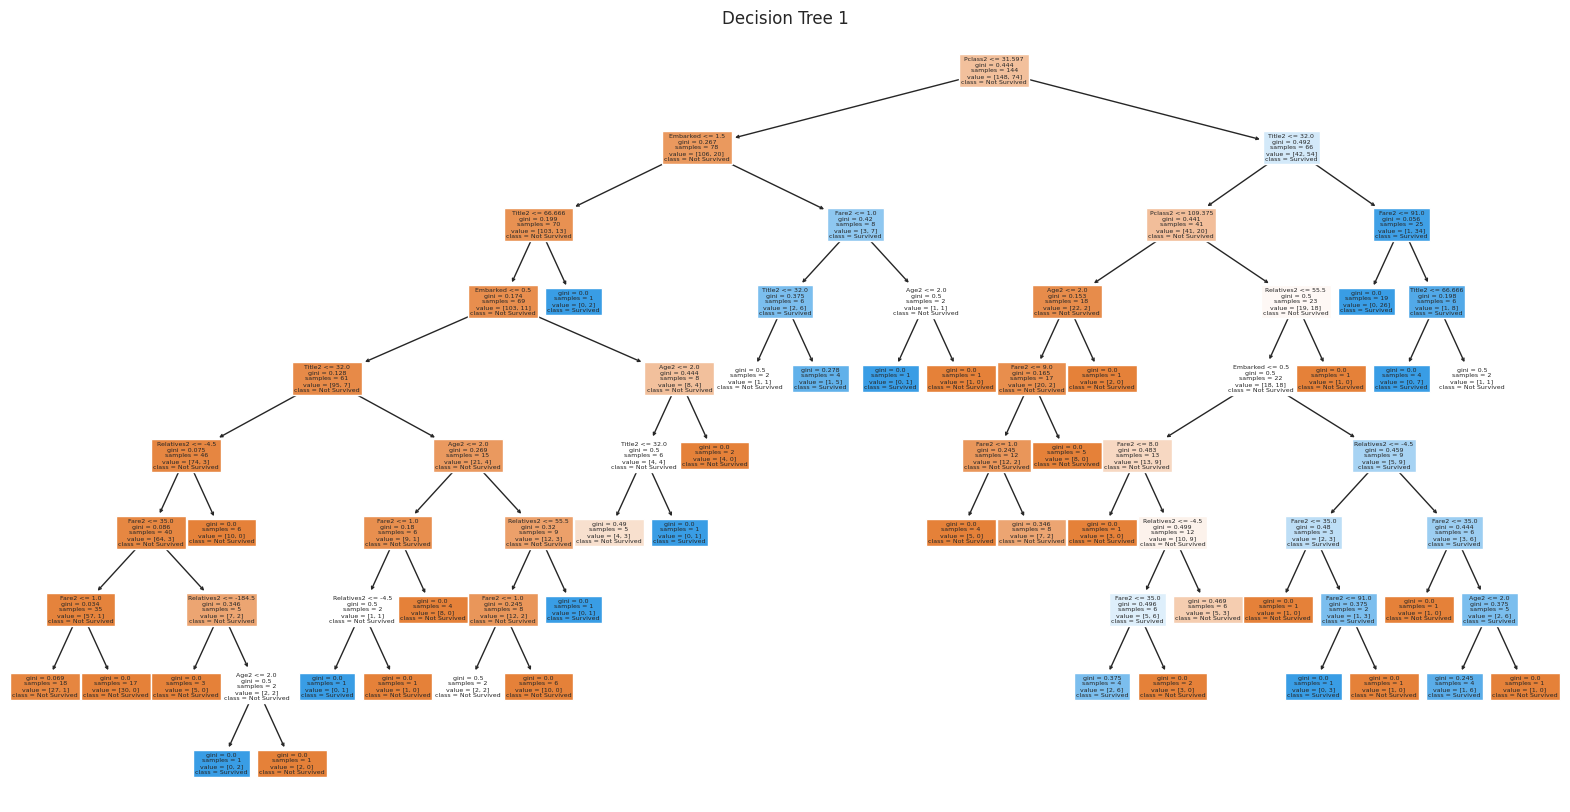

In [28]:
from sklearn.tree import plot_tree

# Visualize the first tree in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree 1')
plt.show()

#unimportant, just one tree to see what's going on


#Let's try our 3rd Algorithm - K-means clustering



In [33]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the target variable for clustering
X_cluster = df0.drop('Survived', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [34]:
# Choose the number of clusters
n_clusters = 2  # Assuming we want to cluster into 2 groups (could be changed)

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Predict the clusters
clusters = kmeans.predict(X_scaled)

# Add the cluster labels to the original DataFrame
df0['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


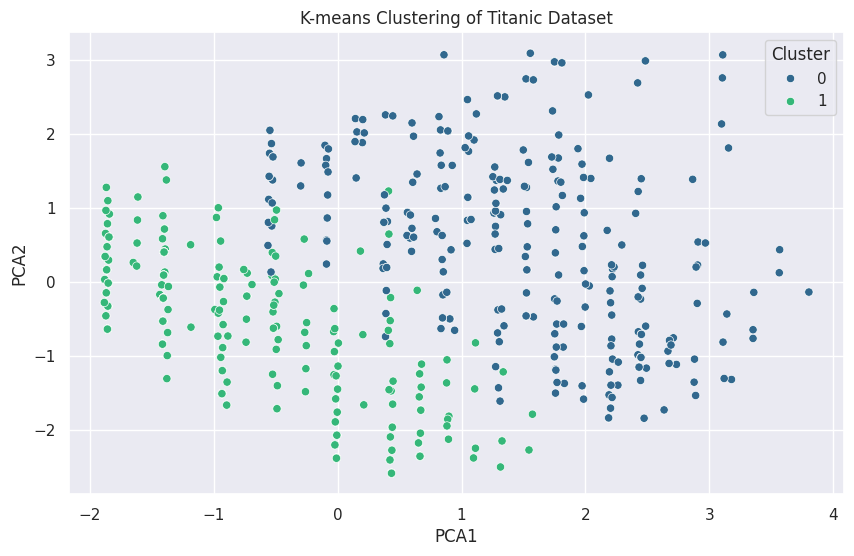

In [35]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering of Titanic Dataset')
plt.show()


In [36]:
# Cross-tabulation of the clusters and actual labels
ct = pd.crosstab(df2['Survived'], df2['Cluster'], rownames=['Survived'], colnames=['Cluster'])
print(ct)


Cluster     0    1
Survived          
0.0       442  107
1.0        71  271


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Function to map cluster labels to the most frequent true labels
def map_clusters_to_labels(clusters, true_labels):
    mapping = {}
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        most_common = true_labels[mask].mode()[0]
        mapping[cluster] = most_common
    return mapping

# Map cluster labels to true labels
cluster_to_label_mapping = map_clusters_to_labels(df0['Cluster'], df0['Survived'])
mapped_labels = df0['Cluster'].map(cluster_to_label_mapping)

# Evaluate the clusters
conf_matrix = confusion_matrix(df0['Survived'], mapped_labels)
class_report = classification_report(df0['Survived'], mapped_labels)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.8011958146487295
Confusion Matrix:
[[428 121]
 [ 80 262]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       549
         1.0       0.68      0.77      0.72       342

    accuracy                           0.77       891
   macro avg       0.76      0.77      0.77       891
weighted avg       0.78      0.77      0.78       891



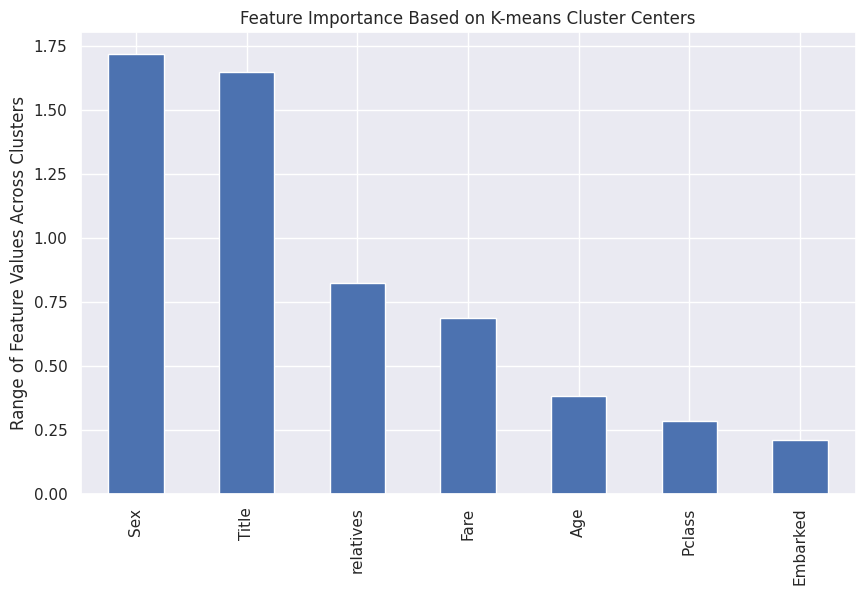

In [38]:
import numpy as np
import pandas as pd

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame with the cluster centers
centers_df0 = pd.DataFrame(cluster_centers, columns=X_cluster.columns)

# Calculate the range (max-min) for each feature across the cluster centers
feature_ranges = centers_df0.max() - centers_df0.min()

# Sort the features by the range
sorted_features = feature_ranges.sort_values(ascending=False)

# Plot the sorted feature ranges
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.title('Feature Importance Based on K-means Cluster Centers')
plt.ylabel('Range of Feature Values Across Clusters')
plt.show()
